In [2]:
from ultralytics import YOLO

model_Path='best.pt'
model=YOLO(model_Path)
source_image='test1.jpg'

images=[
    'test1.jpg'
]

results = model.predict(
    source=images,
    conf=0.25,    # Umbral de confianza
    save=False,   # No que dibuje YOLO; lo haremos manualmente con OpenCV
    verbose=False
)

Total de detecciones: 1
Recorte guardado en: recortes\recorte_1.jpg


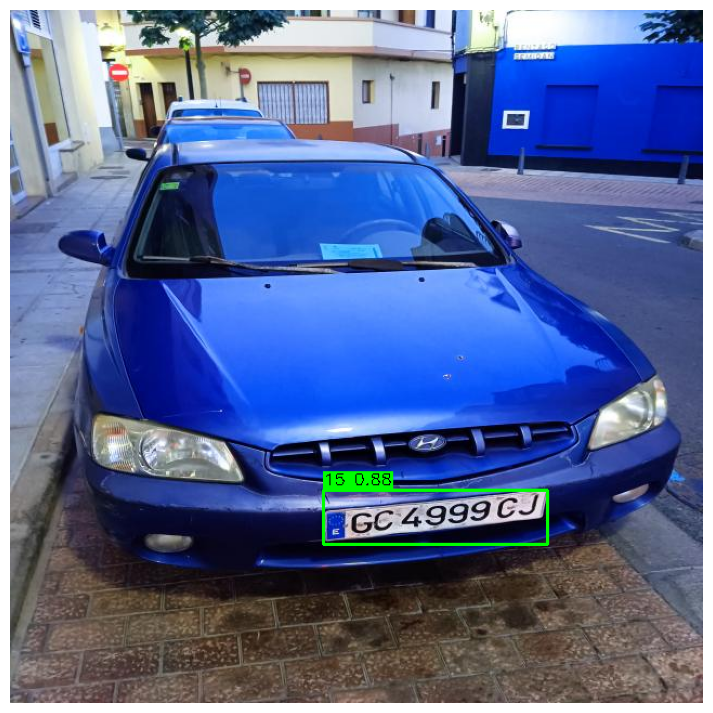

In [3]:
import cv2
import matplotlib.pyplot as plt
import os

# Leer la imagen original
orig_img = cv2.imread(source_image)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Crear una carpeta para guardar los recortes
output_folder = "recortes"
os.makedirs(output_folder, exist_ok=True)

# Obtener las predicciones
predictions = results[0]
print(f"Total de detecciones: {len(predictions.boxes)}")

# Iterar sobre las cajas detectadas
for i, box in enumerate(predictions.boxes):
    x1, y1, x2, y2 = box.xyxy[0]

    # Convertir a int para recortar
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    # Recortar la región de interés (ROI)
    cropped_img = orig_img[y1:y2, x1:x2]

    # Guardar el recorte como una imagen
    cropped_path = os.path.join(output_folder, f"recorte_{i + 1}.jpg")
    cropped_img_bgr = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR)  # Convertir a BGR para guardar con OpenCV
    cv2.imwrite(cropped_path, cropped_img_bgr)

    print(f"Recorte guardado en: {cropped_path}")

    # Dibujar el rectángulo en la imagen original
    color = (0, 255, 0)  # Verde
    thickness = 2
    cv2.rectangle(orig_img, (x1, y1), (x2, y2), color, thickness)

    # Texto (etiqueta + confianza)
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    class_name = model.names[cls_id] if model.names and cls_id < len(model.names) else f"cls_{cls_id}"
    label = f"{class_name} {conf:.2f}"
    (tw, th), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(orig_img, (x1, y1 - th - baseline), (x1 + tw, y1), color, -1)
    cv2.putText(orig_img, label, (x1, y1 - baseline),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

# Mostrar la imagen original con las detecciones
plt.figure(figsize=(16, 9))
plt.imshow(orig_img)
plt.axis("off")
plt.show()

In [5]:
# Ruta para guardar la imagen con las detecciones
output_image_path = "recortes/detecciones.jpg"

# Convertir la imagen a BGR para guardar con OpenCV
output_img_bgr = cv2.cvtColor(orig_img, cv2.COLOR_RGB2BGR)

# Guardar la imagen
cv2.imwrite(output_image_path, output_img_bgr)
print(f"Imagen con detecciones guardada en: {output_image_path}")

Imagen con detecciones guardada en: recortes/detecciones.jpg
